In [1]:
!pip install "dask[complete]"
!pip install pyarrow pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.6.4
    Uninstalling importlib-metadata-4.6.4:
      Successfully uninstalled importlib-metadata-4.6.4


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import re
import dask.dataframe as dd
import glob
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:

# Directory containing the data files (assuming they are in parquet format)
data_dir = '/content/drive/MyDrive/Data_hasking'

# Get a list of all parquet files
file_list = sorted(glob.glob(f"{data_dir}/*.parquet"))

# Define the date range for filtering (December 3 to December 7, 2023)
start_date = pd.to_datetime('2023-12-03')
end_date = pd.to_datetime('2023-12-07')

# Filter the file list based on the date in the filename
filtered_files = [
    f for f in file_list
    if start_date <= pd.to_datetime(f.split('_')[-1].replace('.parquet', ''), format='%Y%m%d') <= end_date
]



In [6]:
# Load the filtered data into a Dask DataFrame
df = dd.read_parquet(filtered_files)

# Compute the DataFrame to get a Pandas DataFrame
df = df.compute()

In [7]:
df

,CUST_CUSTNO,ACC_BUSINESSTYPE,ACC_ACCNO,ACC_BUSINESSNO,ACC_CURRENCYISO,BUSINESSNO_TRANS,FK_CURRENCY,AMOUNT,AMOUNTORIG,BRANCH_OFFICE,...,REASON4,TR_FLAG_01,ANALYTICAL_TRANS_CODE,TR_SP_01,TR_SP_02,TR_SP_03,TR_SP_04,TR_SP_05,TR_SP_10,VALUEDATE
0,1655bf1b772d90df34c51ba9240f683d3847700b330295a077d17e40491d1c28,CASA,0c643de92622a5f3bdb856d4471510b234be53fb0ab018c4ee971bf185b4b362,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391980769,VND,-650.0,-650.0,110000,...,<NA>,N,1|2,e4180c1cc088ebea7f7a882144f55159a8dddad215334fec1f741f658bfcbc1a,MOB,HOI SO SHB,FP,<NA>,NaN,20231203
1,1655bf1b772d90df34c51ba9240f683d3847700b330295a077d17e40491d1c28,CASA,0c643de92622a5f3bdb856d4471510b234be53fb0ab018c4ee971bf185b4b362,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391467506,VND,-34.0,-34.0,110000,...,<NA>,N,1|2,b403758c4a7b9fbc934464efaaaab53c7e24f0b68891f78329e964152de23684,MOB,HOI SO SHB,FP,<NA>,NaN,20231203
2,1b781f92156f274627a131e707e7a890548aea921b84f5ddec59322ebc61e86d,CASA,df774ebe64129d3a6cf3af75e7de8d01ca85e92b2f2c1c44216c782d07183742,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391730083,VND,120000.0,120000.0,110000,...,<NA>,Y,1|1,22527ba60412b7170a3dfcd831805f966b244b354d1607a33d6b0efdeb592bac,NET,HOI SO SHB,FP,<NA>,NaN,20231203
3,53048c1afff7f2cff6e1469fd1659f99ec93696df7a3ce309aef278bfed89856,CASA,2715ec2c8fc66cc32a6accc328d63843fb0dcd5565cd590da6421ddfd950b810,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391677652,VND,-62.0,-62.0,110000,...,<NA>,N,1|2,fb05380821892df14964a30cbe3fd795e0cb225c8da13b3385ddb7b375241f15,MOB,HOI SO SHB,FP,<NA>,NaN,20231203
4,5abad7746ef69e998247ba7848ca6224dd106e300182370090564f0cae691746,CASA,a5dc6ed17504c973d61d1ea548eb1945ae698847f3cb5c9fe44c5388cf45b807,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391519660,VND,-1500.0,-1500.0,110000,...,<NA>,N,1|2,54ff7b7a4f04b0a6e7de5abd7a4473ec7831e5579431a35bd21fceddaad0a1fb,MOB,HOI SO SHB,FP,<NA>,NaN,20231203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802043,b4bb40c42e955a98f1641564f944c8b630b33307e680428e76fb37322d71caf1,<NA>,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,<NA>,2023120794685820,VND,4750.0,4750.0,110000,...,<NA>,N,1|2,98be8d28c01235ba77ff244ca6035dd86086b1ca28ca801a4fca515f57b3b9d6,MOB,HOI SO SHB,A2,VU THI YEN,NaN,20231207
802044,b4bb40c42e955a98f1641564f944c8b630b33307e680428e76fb37322d71caf1,<NA>,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,<NA>,2023120794734517,VND,-3500.0,-3500.0,110000,...,<NA>,N,1|2,4dc1194ff047ca5307f6848f4b69aa562c00e6022e5413205404eb622c803a6a,MOB,HOI SO SHB,FP,<NA>,NaN,20231207
802045,b4bb40c42e955a98f1641564f944c8b630b33307e680428e76fb37322d71caf1,<NA>,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,<NA>,2023120794734516,VND,900.0,900.0,110000,...,<NA>,Y,1|1,983fc2ba457d77883ea2a5160e77b81ffb98dc6e325abec2907a4ed8e43ec90c,NET,HOI SO SHB,FP,<NA>,NaN,20231207
802046,b4bb40c42e955a98f1641564f944c8b630b33307e680428e76fb37322d71caf1,<NA>,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,<NA>,2023120794734518,VND,-850.0,-850.0,110000,...,<NA>,N,1|2,38213e45e4a821d58cc7f7ca3294ba14479168f67bf22ea53ca5a15e2eb8bc60,MOB,HOI SO SHB,FP,<NA>,NaN,20231207


In [8]:
# Filter transactions for amounts exactly equal to 100,000 or -100,000
transactions_amount = df[df['AMOUNT'].isin([100000, -100000])]
transactions_amount

,CUST_CUSTNO,ACC_BUSINESSTYPE,ACC_ACCNO,ACC_BUSINESSNO,ACC_CURRENCYISO,BUSINESSNO_TRANS,FK_CURRENCY,AMOUNT,AMOUNTORIG,BRANCH_OFFICE,...,REASON4,TR_FLAG_01,ANALYTICAL_TRANS_CODE,TR_SP_01,TR_SP_02,TR_SP_03,TR_SP_04,TR_SP_05,TR_SP_10,VALUEDATE
2629,5404a9062c9d0f1b71254ada16c2aed7a80d8aacc70bedca03c670e0ee989c4a,CASA,4e15c199b62d45f95ca3e01d433d8d333a10dace98af3ee8c2c299140259dcd6,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391550215,VND,-100000.0,-100000.0,110000,...,<NA>,N,1|2,b686b84e94e1bd1fae82ee39034a39182b41e3239c6acc95144629d58dba5780,MOB,HOI SO SHB,FP,<NA>,NaN,20231203
4799,cec71af75236b7473bb855d77e9d569ede60e9ed0a30d3a9b043e3d387f67a8c,CASA,3cc067e762b50db7d3974bab6965427bd6c7f532d886a6c627bdbcf7048ec062,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391432404,VND,-100000.0,-100000.0,110000,...,<NA>,N,1|1,6fd5da89e63e9a0ca3b131019f4b1c88c257f22ec3edfa78178fad98ce3fc78d,MOB,HOI SO SHB,A2,PHAN BOI NGHI,NaN,20231203
5148,7708a7452244fdfaacea3af4b7c486c2a34c92bce318d1e8885cd50cf60d3182,CASA,2d00887e340870c2188feb0a7c27cb5ae6fb9c90ac6a907c93ca06cf86a947ee,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391528979,VND,-100000.0,-100000.0,110000,...,<NA>,N,1|2,c17d8a723c96805d6b42ed2068dddd148a965b9cea191411fc09be7c9ad5935f,MOB,HOI SO SHB,FP,<NA>,NaN,20231203
5396,843016c5bbada94d695e189d4bbc3ab6c9536795bbce36773ea7e0445fd263a7,CASA,879b5dc6df96969a341dd968fe28728e4ca113014c8b602542d4493c3b878287,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391565990,VND,100000.0,100000.0,110000,...,u XXXXXXXXXXXXXXXX TRAN THI,Y,1|1,bbda665ad2212f5853553bf7e66d715e0ac7ef6e8b86a0cd0fc555b08bc96467,NET,HOI SO SHB,FP,<NA>,NaN,20231203
6810,7d692fb126dbdff1727c59e21a30382f99e114f3c95578d3b4021e33224f3dd3,CASA,50e1af634f54c344e664c2df856df72b21a10659df7d75380186de1a7ce38119,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391567926,VND,-100000.0,-100000.0,110000,...,<NA>,N,1|2,69364012b6b05ee940626337bcbb254b433cabbdd789b7cc52e6bec1caaf5275,MOB,HOI SO SHB,FP,<NA>,NaN,20231203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799314,6e4da7f5cb88c1c5e6a219302ad63fef42d05ecb8191b4d7ab3a8a2297b0f5d9,<NA>,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,<NA>,2023120794694337,VND,100000.0,100000.0,110000,...,<NA>,N,21|45,b236827bd564d767300996741f45703500f40e2cc51b3dcc7f61fe9674d70a97,STP,HOI SO SHB,LP,CITAD SHB,NaN,20231207
800704,b508057f87ec3d1f858541e8d6bee7aac50658e3f19778c74c3a180782ae6c12,<NA>,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,<NA>,2023120794808708,VND,-100000.0,-100000.0,110000,...,<NA>,N,1|2,387bedb762cf616b903a608f67b5134c2be94f71b3bcc1c67e0fbf547d155a84,MOB,HOI SO SHB,FP,<NA>,NaN,20231207
800746,6c85f1ffae2ce5b6f39be6625fddc80129cb2624665b962533c685ad91ba113c,<NA>,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,<NA>,2023120794882850,VND,-100000.0,-100000.0,110308,...,<NA>,N,2|1,439a2865188ad1c2eda2877a60e498c5c02f42046bbec5af436b50d2b337f401,BRC,PGD SO 1/CN QUANG NINH,TD,<NA>,NaN,20231207
801024,2fd6d688bded2e161e7674e48c8412c7729897ec371525d29e8425f891af898d,<NA>,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,<NA>,2023120795365478,VND,-100000.0,-100000.0,110000,...,<NA>,Y,1|2,a6adc51e077f77aecf1c8c7aeff9638d15957be340556de05d94392e5b48f297,NET,HOI SO SHB,FP,<NA>,NaN,20231207


In [9]:

# Group transactions by customer and check if both 100,000 and -100,000 amounts exist
filtered_customers = transactions_amount.groupby('CUST_CUSTNO')\
                                      .apply(lambda x: 100000 in x['AMOUNT'].values and -100000 in x['AMOUNT'].values)\
                                      .reset_index(name='has_both_transactions')

# Filter for customers with both types of transactions
filtered_customers = filtered_customers[filtered_customers['has_both_transactions']]

# Get the list of customer IDs
customer_ids_with_both = filtered_customers['CUST_CUSTNO'].tolist()

# Filter the original transactions DataFrame for these customers
result_df = transactions_amount[transactions_amount['CUST_CUSTNO'].isin(customer_ids_with_both)]
result_df


,CUST_CUSTNO,ACC_BUSINESSTYPE,ACC_ACCNO,ACC_BUSINESSNO,ACC_CURRENCYISO,BUSINESSNO_TRANS,FK_CURRENCY,AMOUNT,AMOUNTORIG,BRANCH_OFFICE,...,REASON4,TR_FLAG_01,ANALYTICAL_TRANS_CODE,TR_SP_01,TR_SP_02,TR_SP_03,TR_SP_04,TR_SP_05,TR_SP_10,VALUEDATE
7920,76d8b060fe13253fc93ae65072eca87fe32c3a46a34dc9f897b9db42a46d2321,CASA,eb8de8420558cfcf61ffc2e10637467d4e473a5cc4c62492ca04958951d52bb6,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391763972,VND,-100000.0,-100000.0,120302,...,<NA>,N,2|1,099a7b52526eb88deaa86718797ca46c46076688dd0083ac9a28dfad9a187d9e,BRC,PGD NINH HOA/CN KHANH HOA,TD,<NA>,NaN,20231203
8304,76d8b060fe13253fc93ae65072eca87fe32c3a46a34dc9f897b9db42a46d2321,CASA,eb8de8420558cfcf61ffc2e10637467d4e473a5cc4c62492ca04958951d52bb6,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391885231,VND,100000.0,100000.0,110000,...,<NA>,Y,1|1,0b6ef1f14b7d06708a67208215606a376b7fb1d3f33884bda38fa2b4811b3a5c,NET,HOI SO SHB,FP,<NA>,NaN,20231203
10445,fd8c6948039df262db8ff8594af572f11502dbef68419a357199fffa0225a587,CASA,73df4b36c67a6a2bd26cd8820f4bc8b99ab51dfeb0d6e6d3a8879732661b5a34,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391438742,VND,-100000.0,-100000.0,110000,...,<NA>,N,1|1,7af11b37765dc7c40e3e2528ddbdbcbb80de0b74ecc59fe2adebbb36a06a7187,MOB,HOI SO SHB,A2,NGUYEN HOANG LONG,NaN,20231203
12486,f65f769b3e20dbe269cc8d5ac6c0195fadcd8cddfacc54aa1198f6f8ae0b9b71,CASA,ad03b4b83a1b5261323db00a5c908913e530eef5e05c630a7e88c56f8af148ba,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391933335,VND,100000.0,100000.0,110000,...,X),Y,1|1,a69fa7d1e0e61c228df3803dda9acd1129dfffefd32c7986596d99dee8afcc99,NET,HOI SO SHB,FP,<NA>,NaN,20231203
12983,d51985753a0011e32a3b62e62a499a5720392d6fce195328fa813b2e320bf34c,CASA,2025ceafcab91cff08ceb060802780497de4e5285aa3873dc5b61b48b2be970a,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391949228,VND,100000.0,100000.0,110000,...,<NA>,Y,1|1,86f9acd8693f9fcca9d12e255a71c11c68a630f8ade6000a98c618e35db6c0c9,NET,HOI SO SHB,FP,<NA>,NaN,20231203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796323,2fed8edb036a427d8a2b8409e2d4e50f79bbdcd4b6fa6c6addd3b731d161c2a7,<NA>,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,<NA>,2023120795321724,VND,-100000.0,-100000.0,110316,...,<NA>,N,2|1,76bcba36f1318d2067325fe61952707bfc16871b022b000bc7582af96281b8cd,BRC,PGD MAO KHE/CN QUANG NINH,TD,<NA>,NaN,20231207
796345,2fed8edb036a427d8a2b8409e2d4e50f79bbdcd4b6fa6c6addd3b731d161c2a7,<NA>,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,<NA>,2023120795321723,VND,100000.0,100000.0,110000,...,<NA>,Y,1|1,5f870cb6315eae836f9c8113c1b88486d9547eb90d581dadeb58fe8734604adb,NET,HOI SO SHB,FP,<NA>,NaN,20231207
797375,02005478c6c830b712bd7ca87c82ceb743985f52d3ff4030474da574192a3d1f,<NA>,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,<NA>,2023120795307773,VND,100000.0,100000.0,110000,...,<NA>,Y,1|1,3a351a0229b29fb070207afd7c4dd7756bdf68c148e9610d4e861e692d41ce89,NET,HOI SO SHB,FP,<NA>,NaN,20231207
797387,02005478c6c830b712bd7ca87c82ceb743985f52d3ff4030474da574192a3d1f,<NA>,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,<NA>,2023120795307774,VND,-100000.0,-100000.0,110000,...,<NA>,N,1|2,81a9de5e410525071110b8113bc2f473b89e0c8416ea7fdb160ca9325f3d0f72,MOB,HOI SO SHB,FP,<NA>,NaN,20231207


In [10]:
for customer in result_df['CUST_CUSTNO'].unique():
  print(f"Customer {customer}:")
  customer_transactions = result_df[result_df['CUST_CUSTNO'] == customer]
  for _, row in customer_transactions.iterrows():
    print(f"  - Amount: {row['AMOUNT']}")
  print()


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.

Customer 01ae5ea748aa4a34db89e4f983b10bef423fd1b71d9a1befc93c52d444d03d10:
  - Amount: 100000.0
  - Amount: -100000.0

Customer 70c5a0dc10d7ad38e40739323ea92f70cec8297a553a670ab854e3bf3e79d8d8:
  - Amount: 100000.0
  - Amount: 100000.0
  - Amount: -100000.0

Customer 5ace7df6daeb37aab7a84dd3ca04ab1e5173a37ee131bdcd5be0ab28efe38f32:
  - Amount: -100000.0
  - Amount: 100000.0
  - Amount: 100000.0
  - Amount: 100000.0

Customer 61c6ccd4cb0234b732813841b18e512e2b9a9734cd51226f119f61b86cd84591:
  - Amount: 100000.0
  - Amount: -100000.0

Customer 3addbcb46a8f751b9f204d978f78cbba53af6309c4d9aef2b7d8e90493d3c9e2:
  - Amount: 100000.0
  - Amount: -100000.0

Customer c01caf650786a3d1f3e9626788cc21f2bbc5440d8a7bacaedf322edc1b742bad:
  - Amount: -100000.0
  - Amount: -100000.0
  - Amount: 100000.0

Customer 2123f456ab594747ed70b3e2d6909de1575b811e31a5054a2dbca1bc7dc45534:
  - Amount: 100000.0
  - Amount: 100000.0
  - A

In [11]:

# Group transactions by customer and VALUEDATE, then count occurrences of each amount
transaction_counts = result_df.groupby(['CUST_CUSTNO', 'VALUEDATE', 'AMOUNT'])['AMOUNT'].count().unstack(fill_value=0)

# Rename columns for clarity
transaction_counts.columns = ['count_100000', 'count_-100000']

# Reset index to make CUST_CUSTNO and VALUEDATE regular columns
transaction_counts = transaction_counts.reset_index()

transaction_counts


,CUST_CUSTNO,VALUEDATE,count_100000,count_-100000
0,0007c2cfad20bdb52d8285196af079100b824413fdbe41d4f14dedb85c9c5309,20231204,2,2
1,000975b0ee367856502b174994023821120d5730b3fcd384eda36753a7e1e2c7,20231205,1,1
2,000975b0ee367856502b174994023821120d5730b3fcd384eda36753a7e1e2c7,20231207,1,0
3,000c7a8dc930b1c38d5283351cc9f8ed116b21678639f30ef643cbffb3fe594a,20231205,2,1
4,001921dda5635e50b4f619afc17fbb776adb5556b1ab08e09203048f64843ea9,20231205,1,1
...,...,...,...,...
4801,ffb0b16a94c4f6ae1fedfde60bb7d2ec8eeeec35f2c1289bfe65229b6142f52e,20231206,1,1
4802,ffbfb9dff789505b49ae502c7d095b631bc5f671dcb89b2d46c78bedb27cb257,20231206,1,1
4803,fff19c110a51b1bc27ad3c1522cbca80d8841483dbeb87dc09c5b965e2563950,20231205,1,1
4804,fffb93ce64ca2b95eec1756bede5a0b14db89cea65c759868375b5bfc06ee404,20231204,1,1


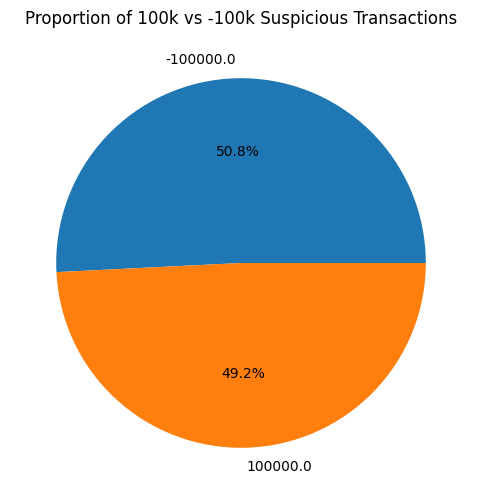

In [12]:
# Pie Chart of Transaction Types (100k vs -100k)
transaction_type_counts = result_df['AMOUNT'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(transaction_type_counts, labels=transaction_type_counts.index, autopct='%1.1f%%')
plt.title('Proportion of 100k vs -100k Suspicious Transactions')
plt.show()

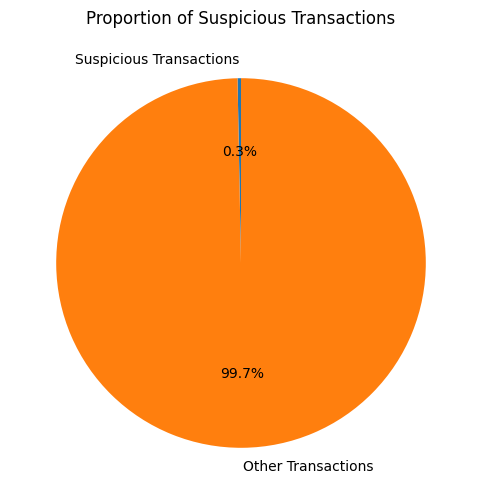

In [13]:
# Pie Chart of Suspicious Transactions vs Total Transactions
# Count total transactions and suspicious transactions
total_transactions = len(df)
suspicious_transactions = len(result_df)

# Create labels and data for the pie chart
labels = ['Suspicious Transactions', 'Other Transactions']
sizes = [suspicious_transactions, total_transactions - suspicious_transactions]

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Suspicious Transactions')
plt.show()


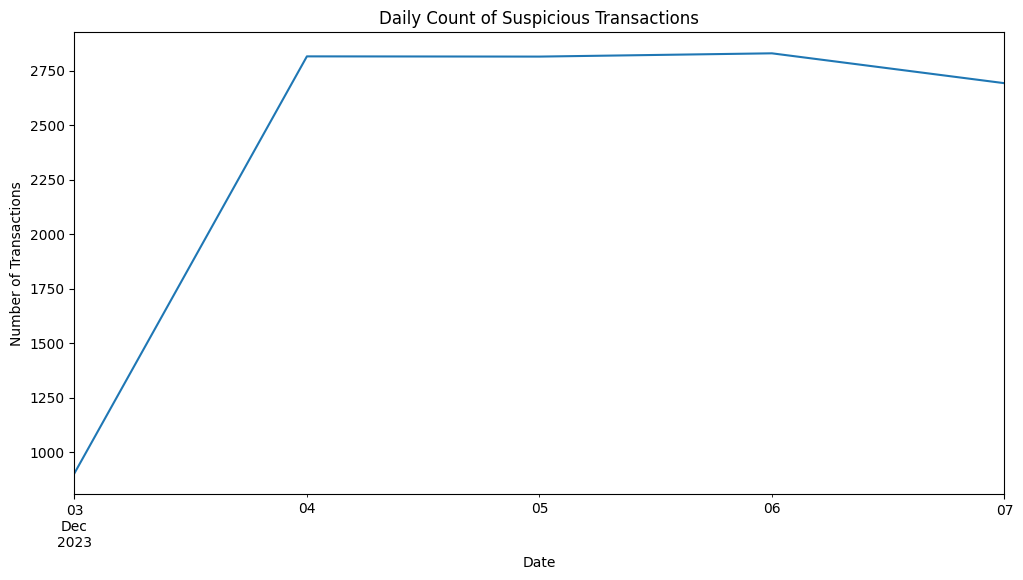

In [14]:
# Time Series of Suspicious Transactions
if 'VALUEDATE' in result_df.columns:
  result_df['VALUEDATE'] = pd.to_datetime(result_df['VALUEDATE'])
  result_df.set_index('VALUEDATE', inplace=True)
  daily_counts = result_df.resample('D').size()
  plt.figure(figsize=(12, 6))
  daily_counts.plot()
  plt.title('Daily Count of Suspicious Transactions')
  plt.xlabel('Date')
  plt.ylabel('Number of Transactions')
  plt.show()

**Rule15**

In [15]:
tb_customers = dd.read_parquet('/content/drive/MyDrive/TB_CUSTOMERS.parquet')

In [16]:
tb_customers_df =  tb_customers.compute()
tb_customers_df

,CUST_CUSTNO,CUSTOMER_TYPE,BUSINESS_TYPE,INDUSTRY_TYPE
0,e2eaa7a94d5e3bcd15579df95cfadcc33a9ffef9832e5073426dc36a3499c069,Cá nhân,CA THE,DICH VU LUU TRU VA AN UONG
1,30882b5b40eb85071295cc78276c3b74eb0f73eaebad8f009bc0aa04796a565c,Cá nhân,CA THE,SX &PP DIEN/KHI DOT/NUOC NONG/HOI NUOC/DIEU HOA KK
2,9e70464b7a79b94c07a6dc6cf3eea62c1e4cde0872304fd1e03542c898c0a6e9,Cá nhân,CA THE,HOAT DONG DICH VU KHAC
3,ce932f938de9bbabd34650dc0d8e07e1814d17580d97440d48905c5a7d0f0d09,Cá nhân,CA THE,HOAT DONG DICH VU KHAC
4,9771233eb92c014fd6cc1c0312a93278b5b933fc01a64d0a3f24dac62cd92812,Cá nhân,CA THE,HOAT DONG DICH VU KHAC
...,...,...,...,...
3179025,cc1748a291074998ab6fd12d995f4773618f75aac4f6cf33789d8ab3361b658c,Cá nhân,CA THE,HOAT DONG DICH VU KHAC
3179026,40062bd373af28817793d4b15ca498238a103ca39213d7857a039181a9328a54,Cá nhân,CA THE,HOAT DONG DICH VU KHAC
3179027,5c3d7ca15098f3d43a0b47f193f4a1a47f11b35ca8717277c64b165e2fa3c745,Cá nhân,CA THE,HOAT DONG DICH VU KHAC
3179028,b806e3779fe5fcd0efe15d027a91069a07304cddf213a708c8f4318a2305e347,Cá nhân,CA THE,HOAT DONG DICH VU KHAC


In [17]:
# Filter for individual customers
tb_customers_individual_df = tb_customers_df[tb_customers_df["CUSTOMER_TYPE"] == "Cá nhân"]

In [18]:
individual_customers = tb_customers_individual_df["CUST_CUSTNO"].unique().tolist()

In [19]:
# Filter transactions for individual customers
df_individual = df[df['CUST_CUSTNO'].isin(individual_customers)]

In [20]:
# Convert VALUEDATE to datetime
df_individual['VALUEDATE'] = pd.to_datetime(df_individual['VALUEDATE'], errors='coerce')

In [21]:
# Extract date only from VALUEDATE
df_individual['DATE_ONLY'] = df_individual['VALUEDATE'].dt.date

In [22]:

# Separate deposits (receipts) and withdrawals
df_deposits = df_individual[df_individual['AMOUNT'] > 0]
df_withdrawals = df_individual[df_individual['AMOUNT'] < 0]

In [23]:
# Aggregate amounts by customer and date
daily_deposits = df_deposits.groupby(['CUST_CUSTNO', 'DATE_ONLY'])['AMOUNT'].sum().reset_index(name='total_deposits')
daily_withdrawals = df_withdrawals.groupby(['CUST_CUSTNO', 'DATE_ONLY'])['AMOUNT'].sum().reset_index(name='total_withdrawals')

In [24]:
# Merge deposits and withdrawals
transactions = pd.merge(daily_deposits, daily_withdrawals, on=['CUST_CUSTNO', 'DATE_ONLY'], how='outer')


In [25]:
# Fill missing values with 0
transactions['total_deposits'].fillna(0, inplace=True)
transactions['total_withdrawals'].fillna(0, inplace=True)

In [26]:
# Calculate the proportion of withdrawals to deposits
transactions['withdrawal_to_deposit_ratio'] = (transactions['total_withdrawals'].abs() / transactions['total_deposits']) * 100


In [27]:
# Apply the rule conditions
filtered_transactions = transactions[
    (transactions['total_deposits'] >= 6000000) &
    (transactions['total_withdrawals'].abs() >= 0.95 * transactions['total_deposits'])
]

# Display the final DataFrame containing all anomalous transactions
filtered_transactions

,CUST_CUSTNO,DATE_ONLY,total_deposits,total_withdrawals,withdrawal_to_deposit_ratio
80,0006be2d315a38f8bf20389ecc4c9b3cde3455277212b0a4e79095a5fb790c45,2023-12-06,15205518.19,-44995036.28,295.912548
1046,00769b898390fffb9f011f3a58f8758f11737956f1f8138b6da258e89fce700b,2023-12-06,7100000.00,-7100000.00,100.000000
3638,01ab26eb527cdd14231a98190513c17f79adf22a41a344f90f571dbacde3ee99,2023-12-04,7082000.00,-7508526.99,106.022691
3838,01c2c20c678a483e31e6df4f207442358851f271cfc1daf4ef0775681fcf11c5,2023-12-04,13528109.60,-13514054.81,99.896107
5274,027d7d445b32f73d6f1033c1b66fc4cbc68a8bb26a075ee0a4a50283b0b26083,2023-12-04,8000000.00,-8000000.00,100.000000
...,...,...,...,...,...
541122,fe7b9ab8a20d79a7fdbb6233a08d60f3a6cdad591db50de305890397f7910535,2023-12-04,10018500.00,-10062000.00,100.434197
543436,ff8d7492d6aa39bc6177141f150c866919549060c062e2adfe2bda8b7fb0661d,2023-12-04,8770000.00,-8600000.00,98.061574
543437,ff8d7492d6aa39bc6177141f150c866919549060c062e2adfe2bda8b7fb0661d,2023-12-05,13938646.00,-14006929.75,100.489888
543438,ff8d7492d6aa39bc6177141f150c866919549060c062e2adfe2bda8b7fb0661d,2023-12-06,10644000.01,-10578146.00,99.381304


In [28]:

# Get the unique customer IDs
unique_customers = filtered_transactions['CUST_CUSTNO'].unique()

# Print the list of unique customers
unique_customers


<ArrowStringArray>
['0006be2d315a38f8bf20389ecc4c9b3cde3455277212b0a4e79095a5fb790c45',
 '00769b898390fffb9f011f3a58f8758f11737956f1f8138b6da258e89fce700b',
 '01ab26eb527cdd14231a98190513c17f79adf22a41a344f90f571dbacde3ee99',
 '01c2c20c678a483e31e6df4f207442358851f271cfc1daf4ef0775681fcf11c5',
 '027d7d445b32f73d6f1033c1b66fc4cbc68a8bb26a075ee0a4a50283b0b26083',
 '029d78ce6604cd3fbc7d9efe60ad3f4c60db52243c9b30dcf60539b7cd1a77ce',
 '02e1a77cf95a5eae13d9c2a7e784966777d4660b1fd75f619293d6846fd85c96',
 '02ef5a94073d7a7a691456d71af09905859ddf44a5df0171ef07e1790a09a2fb',
 '0319858c86771b5860ec1b80695d380a07f88297ada599fe348484a441362f24',
 '037c993f5c86c4c64d4a1ad85d316930dfac2e1d2cf6a30079b924a28a8504ec',
 ...
 'fcbb8aacf7bf642760b4a285088a7ca1fd6f1f975c468d9ca1307adc936ecb05',
 'fcfa3147628ddb90e300dc471f856fc862653ea9cfec8853ae500906aa2bf9c7',
 'fd07a5136a3735024b24556c563d48f5a00ce6215b6e11304deef9501ff4fa79',
 'fd4cd31a3fb59cbcdc1808c54a22846739c5bb16dee9097877610e36b781f3b1',
 'fd815676

In [29]:

# Get the customer IDs from the previous rule (result_df)
rule1_customers = result_df['CUST_CUSTNO'].unique()

# Find the overlap (intersection) of customers between the two rules
overlapping_customers = set(rule1_customers).intersection(set(unique_customers))

if overlapping_customers:
  print("There are overlapping customers between the two rules:")
  for customer in overlapping_customers:
    print(f"- Customer ID: {customer}")
else:
  print("There are no overlapping customers between the two rules.")

There are overlapping customers between the two rules:
- Customer ID: f7cf23413bfb8528ee00836f1c0c140ed2d68a70b829bc727ec88903ffe44318
- Customer ID: e06cbcef570906eddae9a5da6a60ec2eef93265c60bfa39d89ab7a0f572c99e9
- Customer ID: bd5c2dee503a8d72b3e79a841d699e521c00326fefa97fd0aed5568a309b6837
- Customer ID: 7a33712f04044878553d6b2f31ff2cda73d6529806a962cd376852bee4d3f1cd
- Customer ID: fd8156766926e5360ffba635d4e02e9543014ddd826edc0d2d5835fb617236d1
- Customer ID: 75ecaf5c4f3f4ebfc8edbb4854852d2788c245e4fef8e38321a7736a6ada3bf0
- Customer ID: 136e97d784d83aec67685697f4d308da56516da0c6afcd06cb7d021cd3a51fc3
- Customer ID: ac4f7a878eeb38f23b6ecb23edea34de52e9ff5298618c68364d533a9e93f0e7
- Customer ID: f8ee2392a8a98a9ba0d53e6e48057ea34007e3f2cc8cf6c1026522f759544d78
- Customer ID: 18439a0580c3c56926cedddef3ef5134a5d682f233bbfe107f8400f7f2449538
- Customer ID: 1040e4a23e2de44d9b1391019df9c18a6eb3cd80c84e0ba793188f89541a7946
- Customer ID: 867ab02690218a1b0e62ade11ddb46a56852d17bf18dfe8dcc

In [30]:
# Get transactions for customers who triggered both rules
overlapping_transactions = result_df[result_df['CUST_CUSTNO'].isin(overlapping_customers)]

# Display the overlapping transactions
print("Overlapping Transactions:")
overlapping_transactions


Overlapping Transactions:


,CUST_CUSTNO,ACC_BUSINESSTYPE,ACC_ACCNO,ACC_BUSINESSNO,ACC_CURRENCYISO,BUSINESSNO_TRANS,FK_CURRENCY,AMOUNT,AMOUNTORIG,BRANCH_OFFICE,...,REASON2,REASON4,TR_FLAG_01,ANALYTICAL_TRANS_CODE,TR_SP_01,TR_SP_02,TR_SP_03,TR_SP_04,TR_SP_05,TR_SP_10
VALUEDATE,,,,,,,,,,,,,,,,,,,,,
2023-12-03,d424102ef058feae86c255b1955e5ab3927bdb7ddab130013787ea46088fbfc0,CASA,cf48867c55b70cca6d8d8c88fcecba5739150ae52e4207a00f999ca5e262b2c3,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391437849,VND,-100000.0,-100000.0,110000,...,NGUYEN HONG NHUNG,<NA>,N,1|1,5fd0ab4630919434d3fc00b9443d9a04e36c497e945621872fba5c69ae2c5fbb,MOB,HOI SO SHB,A2,NGUYEN HONG NHUNG,NaN
2023-12-03,ebf81bc4718e39d93e23b28bd3d5676ff32480f276968a08a9b8db28b5e62f7a,CASA,d5f945abb28bf1e7f617c80524a4528909228b2a9a93b3f10c9417d7ab142ce4,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391831122,VND,100000.0,100000.0,110000,...,<NA>,<NA>,Y,1|1,cd012a336c103f9b9b5c9100121eb9d33a5ec29af0e2f7215a44874dd4ff2552,NET,HOI SO SHB,FP,<NA>,NaN
2023-12-03,fcbb8aacf7bf642760b4a285088a7ca1fd6f1f975c468d9ca1307adc936ecb05,CASA,3b91ca8a1b50af39ed195cc98dfb8b1716255f8f90b55cf0efdf9969b435a04a,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391743257,VND,-100000.0,-100000.0,110000,...,KHOAN tien hang so fa THAI,VAN TAN,N,1|2,6165309d105d9a5b51adbca083f576984099fb95b4b81d142ab040405ef04839,MOB,HOI SO SHB,FP,<NA>,NaN
2023-12-03,461f7c00d26b63f9f75dcf5b6810ad8edeaa0d70fc5ecedd873da71d3cf50c2f,CASA,6486f35778b3cf97303d7891479deb89e437a05ddc380cd5a743c4a3b350b3e7,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391761419,VND,-100000.0,-100000.0,110000,...,AN LE VAN XUAN,<NA>,N,1|2,00c9abfd891c17c17cdf8bc609e0dd91d39d49763fde6dc4ac7812ad75059930,MOB,HOI SO SHB,FP,<NA>,NaN
2023-12-03,6ed4c364f99ee885df8ef9a888ba0825247aa30529dae5a66c2b0a4f6190084a,CASA,03a2613ce25941200ae3c485e657cc58c7c336a462bdc9751c885b35ca707256,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120391730660,VND,-100000.0,-100000.0,110000,...,HONG CUC,<NA>,N,1|2,71d7c73b3810d4e9cfdfa54ebcc433dd81cc66cc2c3fec86fd0e19759b179aa6,MOB,HOI SO SHB,FP,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-07,99f520b53ca6ba2869cef7b4ad2197d11d77ed7555a8962a336eda66b78e4d9f,CASA,d02a27840f740c403cb368822141bf08553394c8e6d429e99e9636955ccd01cc,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120794898588,VND,100000.0,100000.0,110000,...,hoan,<NA>,N,1|1,74c159adffc9f2b87a122662e30cae84cf902703e101e8ad7e07e6ce1dfe016c,MOB,HOI SO SHB,FP,<NA>,NaN
2023-12-07,99f520b53ca6ba2869cef7b4ad2197d11d77ed7555a8962a336eda66b78e4d9f,CASA,d02a27840f740c403cb368822141bf08553394c8e6d429e99e9636955ccd01cc,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120794898589,VND,100000.0,100000.0,110000,...,hoan,<NA>,N,1|1,2aeda2d16298c2ad4a548f747f5a0f17b664241f5a6df5a55a4f3febf94ad152,MOB,HOI SO SHB,FP,<NA>,NaN
2023-12-07,99f520b53ca6ba2869cef7b4ad2197d11d77ed7555a8962a336eda66b78e4d9f,CASA,d02a27840f740c403cb368822141bf08553394c8e6d429e99e9636955ccd01cc,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023120794898590,VND,100000.0,100000.0,110000,...,hoan,<NA>,N,1|1,1de47baf1bdf92cdf1e02a583e23b8c40783f20be29889588a600678458a2e65,MOB,HOI SO SHB,FP,<NA>,NaN


In [32]:
# Calculate the percentage of overlapping transaction
percentage_overlap = (len(overlapping_transactions) / len(result_df)) * 100
print(f"Percentage of overlapping transactions: {percentage_overlap:.2f}%")


Percentage of overlapping transactions: 2.16%


In [31]:
# Display the ACC_BUSINESSTYPE for overlapping transactions
print("ACC_BUSINESSTYPE for Overlapping Transactions:")
print(overlapping_transactions['ACC_BUSINESSTYPE'].unique())


ACC_BUSINESSTYPE for Overlapping Transactions:
<ArrowStringArray>
['CASA', 'TIDE', 'LOAN']
Length: 3, dtype: string
